In [97]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [98]:
#load files and check contents

citydata_df = pd.read_csv('./resources/city_data.csv')
ridedata_df = pd.read_csv('./resources/ride_data.csv')
display(citydata_df.tail(), ridedata_df.tail())

,city,driver_count,type
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural
119,South Saramouth,7,Rural


,city,date,fare,ride_id
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298


In [99]:
#inspect city data

display(citydata_df.isna().sum())
display(citydata_df.dtypes)

city            0
driver_count    0
type            0
dtype: int64

city            object
driver_count     int64
type            object
dtype: object

In [100]:
citydata_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [101]:
display(sum(citydata_df["type"]=="Urban"))
display(sum(citydata_df['type']=="Suburban"))
display(sum(citydata_df['type']=='Rural'))

66

36

18

In [102]:
#Inspect ride data

ridedata_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [103]:
ridedata_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [104]:
ridedata_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [105]:
pyber_data_df = pd.merge(ridedata_df, citydata_df, how='left', on=['city', 'city'])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Building the Data subsets to Chart

In [106]:
# Urban Cities Df

urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
display(urban_cities_df.head(), suburban_cities_df.head(), rural_cities_df.head())

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [107]:
#create the groupby objects w/r/t city

urban = urban_cities_df.groupby(['city'])
suburban = suburban_cities_df.groupby(['city'])
rural = rural_cities_df.groupby(['city'])


In [108]:
#First set of data sets to graph

urban_ride_count = urban.count()['ride_id']
suburban_ride_count = suburban.count()['ride_id']
rural_ride_count = rural.count()['ride_id']
display(urban_ride_count.head(), suburban_ride_count.head(), rural_ride_count.head())

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [109]:
#second set of sets to graph

urban_avg_fare = urban.mean()['fare']
suburban_avg_fare = suburban.mean()['fare']
rural_avg_fare = rural.mean()['fare']
display(urban_avg_fare.head(), suburban_avg_fare.head(), rural_avg_fare.head())



city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [110]:
#Third set of data to graph

urban_driver_count = urban.mean()['driver_count']
suburban_driver_count = suburban.mean()['driver_count']
rural_driver_count = rural.mean()['driver_count']
display(urban_driver_count.head(), suburban_driver_count.head(), rural_driver_count.head())




city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

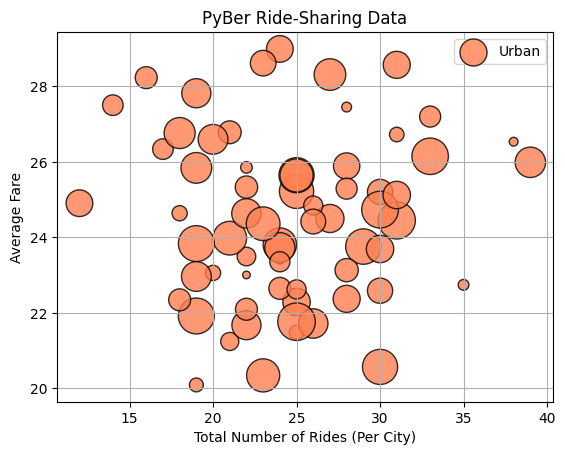

In [111]:
# Scatter plot for urban cities

plt.scatter(urban_ride_count, urban_avg_fare, c='coral', 
            alpha=.8, edgecolor='black', linewidths=1, 
            label='Urban', s=10*urban_driver_count)

plt.title("PyBer Ride-Sharing Data")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


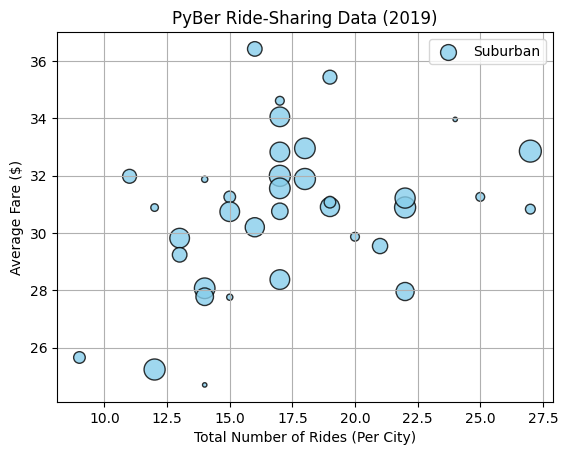

In [112]:
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

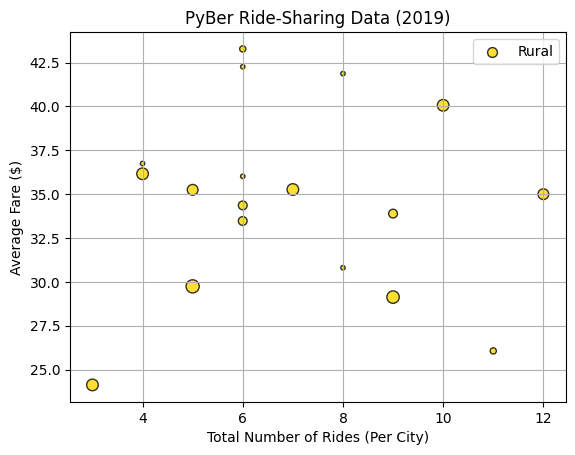

In [113]:
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

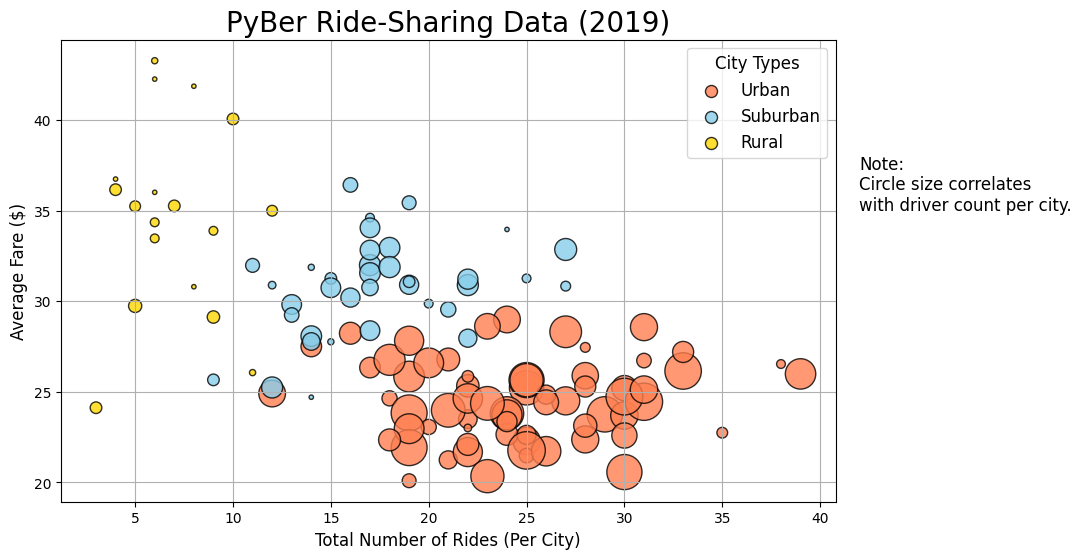

In [115]:
# Merge all plots into one

plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, urban_avg_fare, c='coral', 
            alpha=.8, edgecolor='black', linewidths=1, 
            label='Urban', s=10*urban_driver_count)

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")


plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")


# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

plt.show()

